# ECSE415 - Intro to Computer Vision
## Tutorial 6 - Clustering (2) and Image Blending

## K-Means Clustering
Begin with RGB values.

Image data shape: (103885, 3)


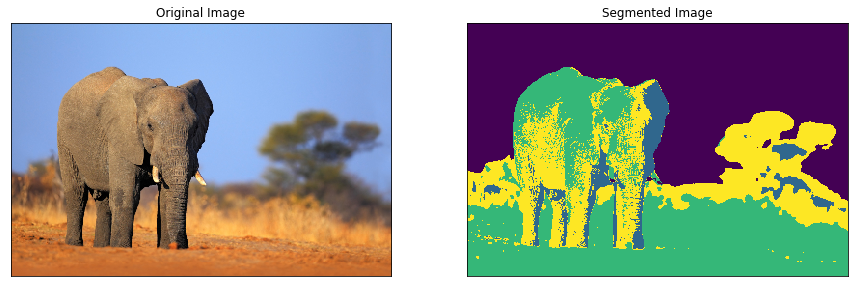

In [2]:
######################
# IMAGE SEGMENTATION #
######################

import numpy as np
import cv2
import matplotlib.pyplot as plt

""" KMEANS """
def perform_kmeans(img_data, K):
    """
    Run KMenas algorithm on img_data
    :param img_data: image data represented as
                [instance, features]
    :param K: number of clusters
    :return img_labels: clustered image
    """
    # define criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
    # set flags
    flags = cv2.KMEANS_RANDOM_CENTERS
    # convert data to float32
    img_data = np.float32(img_data)
    # apply kmeans
    _, labels, _ = cv2.kmeans(img_data, K, None, criteria, 10, flags)
    # reshape into image
    img_labels = labels.reshape((img.shape[0], img.shape[1]))
    return img_labels

""" DISPLAY KMEANS RESULTS """
def display_kmeans(img_data):
    """
    Display the original and segmented image
    :param img_data: image data represented as
                [instance, features]
    :return: nothing
    """
    # number of clusters
    K = 4
    # run kmeans
    img_labels = perform_kmeans(img_data, K)
    # display images
    plt.figure(figsize=(15,15))
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_labels)
    plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
    plt.show()
    
if __name__ == "__main__":
    #read image
    img = cv2.imread("/home/gary/Pictures/elephant.jpg")
    img = cv2.resize(img, None, fx=0.25, fy=0.25)
    # format data
    img_data = img.reshape((img.shape[0] * img.shape[1], 3))
    print("Image data shape:", img_data.shape)
    # KMeans
    display_kmeans(img_data)

## K-Means Clustering
Add in spatial information.

Image data shape: (103885, 5)


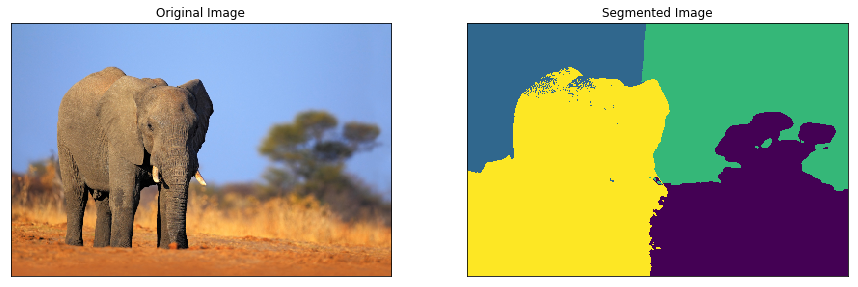

In [5]:
######################
# IMAGE SEGMENTATION #
######################

""" ADDS SPATIAL INFORMATION """
def add_spatial(img, img_data):
    """
    Add spatial information to clustering
    :param img: original input image
    :param img_data: image data represented as
                [instance, features]
    :return img_data: new image data matrix
    """
    # spatial information
    rs = np.arange(img.shape[0])
    cs = np.arange(img.shape[1])
    cs, rs = np.meshgrid(cs, rs)
    rs = rs.reshape((img.shape[0] * img.shape[1], 1))
    cs = cs.reshape((img.shape[0] * img.shape[1], 1))
    # add spatial information
    img_data = np.hstack((img_data, rs))
    img_data = np.hstack((img_data, cs))
    return img_data
    
if __name__ == "__main__":
    # add spatial information
    img_data = add_spatial(img, img_data)
    print("Image data shape:", img_data.shape)
    # KMeans
    display_kmeans(img_data)

## Gabor Filters
A Gabor filter is a linear filter used in texture analysis. The filter analyses whether there are any specific frequency content in the image in specific directions in a localized region around the point or region of analysos.

## K-Means Clustering
We can now add texture information to the KMeans clustering by utilizing these Gabor filter responses.

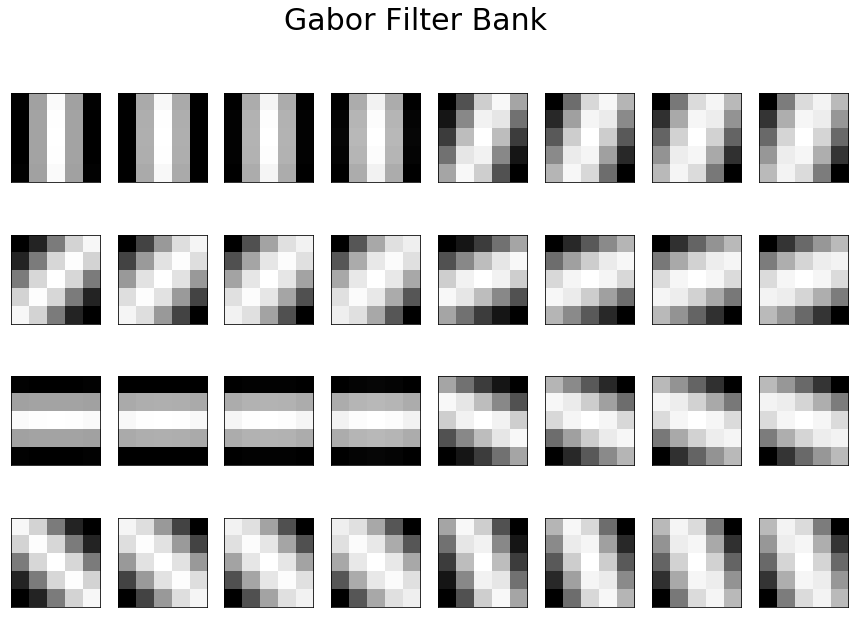

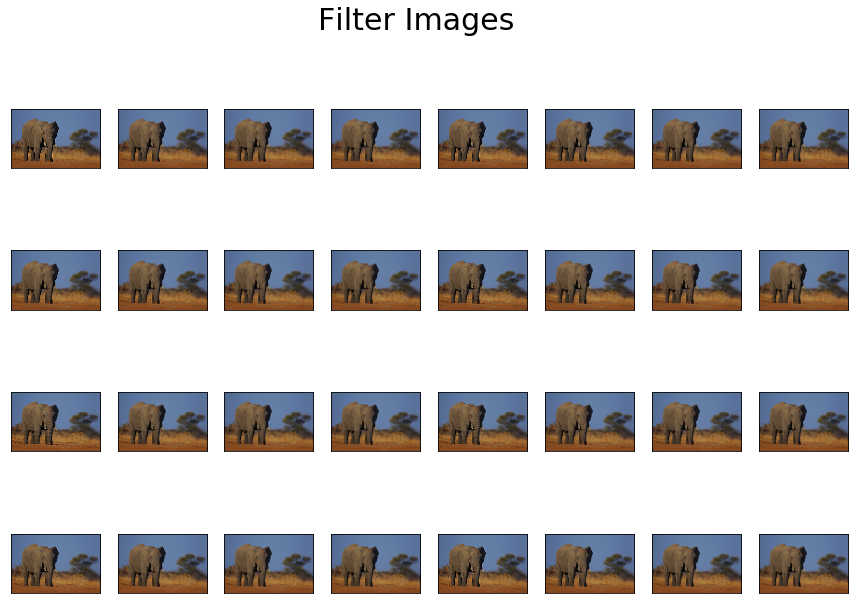

Image data shape: (103885, 101)


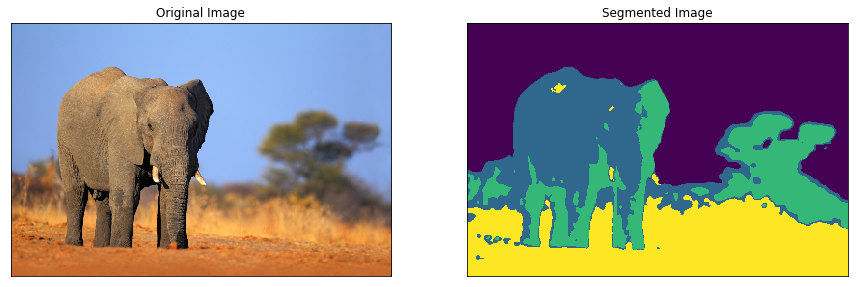

In [20]:
#################
# GABOR FILTERS #
#################
import numpy as np
import cv2
import matplotlib.pyplot as plt

def build_filters():
    filters = []
    ksize = 5
    for theta in np.arange(0, np.pi, np.pi/8):
        for lamda in np.arange(6, 14, 2):
            # cv2.getGaborKernel(ksize, sigma, theta, lamda, gamma, psi, ktype)
            kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
            kern /= 1.5 * kern.sum()
            filters.append(kern)
    return filters

def process(img, filters):
    res_imgs = []
    for filt in filters:
        fimg = cv2.filter2D(img, -1, filt)
        res_imgs.append(fimg)
    return res_imgs

def display_filters(filters):
    plt.figure(figsize=(15,10))
    plt.suptitle("Gabor Filter Bank", fontsize=30)
    count = 0
    for filt in filters:
        count += 1
        plt.subplot(4,8,count)
        plt.imshow(filt, cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()

def display_fimages(images):
    plt.figure(figsize=(15,10))
    plt.suptitle("Filter Images", fontsize=30)
    count = 0
    for img in images:
        count += 1
        plt.subplot(4,8,count)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        plt.xticks([]), plt.yticks([])
    plt.show()
    
def add_gabor(img, img_data, res_img):
    for img in res_imgs:
        gab = img.reshape(img.shape[0] * img.shape[1], 3)
        img_data = np.hstack((img_data, gab))
    return img_data

if __name__ == '__main__':
    # build Gabor filters
    filters = build_filters()
    # display Gabor filters
    display_filters(filters)
    # process input image with filters
    res_imgs = process(img, filters)
    # display resultant filterd image
    display_fimages(res_imgs)
    # add gabor information
    img_data = add_gabor(img, img_data, res_imgs)
    print("Image data shape:", img_data.shape)
    # KMeans
    display_kmeans(img_data)   

## Image Blending
We will demonstrate several image blending algorithms.

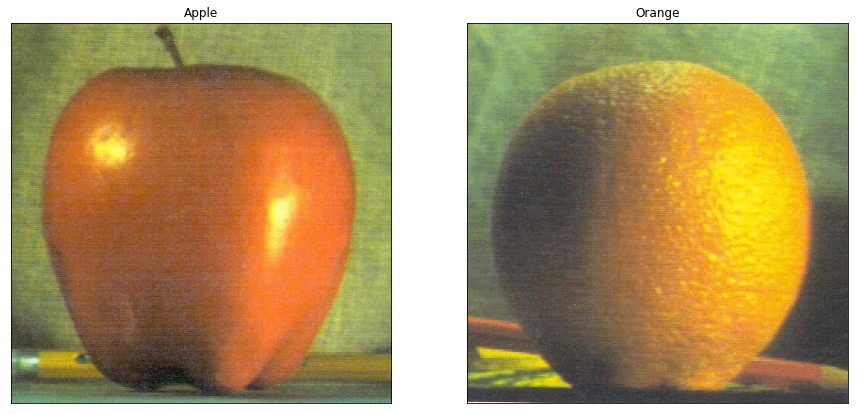

In [4]:
##################
# IMAGE BLENDING #
##################

# read images
A = cv2.imread('/home/gary/opencv/samples/data/apple.jpg')
B = cv2.imread('/home/gary/opencv/samples/data/orange.jpg')

# display images used for blending
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(A, cv2.COLOR_RGB2BGR))
plt.title("Apple"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(B, cv2.COLOR_RGB2BGR))
plt.title("Orange"), plt.xticks([]), plt.yticks([])
plt.show()

## Direct Connecting & Feathering

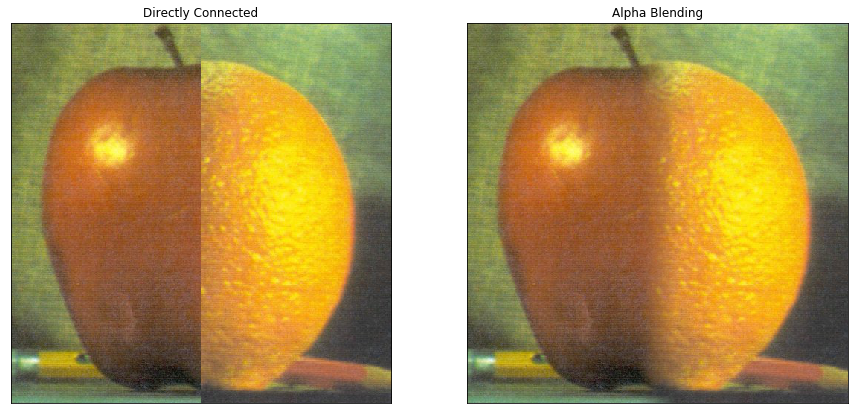

In [10]:
# width and height of image
col, row = A.shape[0:2]
# image with direct connecting each half
real = np.hstack((A[:, :round(col/2)], B[:, round(col/2):]))

""" ALPHA BLENDING """
def Ramp(i_width, r_width, r_index, start, end):
    """
    Create alpha blending function
    :param i_width: img width
    :param r_width: ramp width
    :param r_index: center ramp index
    :param start: starting ramp value
    :param end: ending ramp value
    :return:
    """
    a = np.zeros((i_width))
    step = (end - start) / (r_width-1)
    idx = round(r_index - (r_width / 2))  # left side starting index of alpha ramp
    for i in range(r_width):
        a[idx] = start + step*i
        idx += 1
    a[idx:] = 1
    return a

# alpha blending ramp
ramp_size = 50  # alpha blending ramp size
alpha = Ramp(A.shape[1], ramp_size, round(A.shape[1]/2), 0, 1)
# blend each channel separately
ba, ga, ra = cv2.split(A)
bb, gb, rb = cv2.split(B)
# blending equation
b_blend = (1-alpha) * ba + alpha*bb
g_blend = (1-alpha) * ga + alpha*gb
r_blend = (1-alpha) * ra + alpha*rb
I_blend = cv2.merge((b_blend, g_blend, r_blend))
I_blend = np.uint8(I_blend)  # convert back to uint8

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(real, cv2.COLOR_RGB2BGR))
plt.title("Directly Connected"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(I_blend, cv2.COLOR_RGB2BGR))
plt.title("Alpha Blending"), plt.xticks([]), plt.yticks([])
plt.show()

## Pyramid Blending

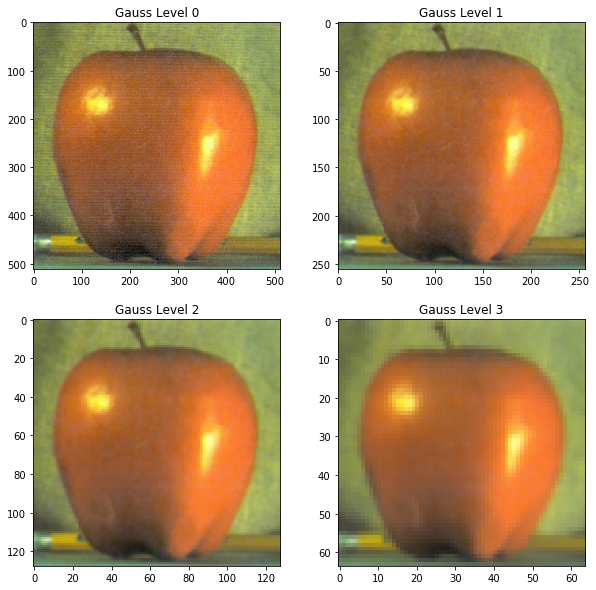

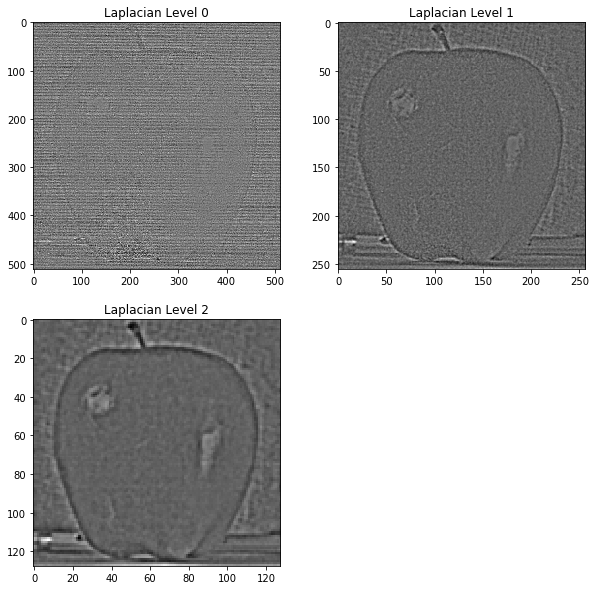

In [42]:
""" BUILDING PYRAMIDS """
# create Gaussian pyramid
lower_res1 = cv2.pyrDown(A)
lower_res2 = cv2.pyrDown(lower_res1)
lower_res3 = cv2.pyrDown(lower_res2)

# display Gaussian pyramid
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('Gauss Level 0')
plt.subplot(222), plt.imshow(cv2.cvtColor(lower_res1, cv2.COLOR_BGR2RGB))
plt.title('Gauss Level 1')
plt.subplot(223), plt.imshow(cv2.cvtColor(lower_res2, cv2.COLOR_BGR2RGB))
plt.title('Gauss Level 2')
plt.subplot(224), plt.imshow(cv2.cvtColor(lower_res3, cv2.COLOR_BGR2RGB))
plt.title('Gauss Level 3')
plt.show()

# create Laplacian pyramid
higher_res1 = cv2.pyrUp(lower_res1, dstsize=(A.shape[1], A.shape[0]))
higher_res2 = cv2.pyrUp(lower_res2, dstsize=(lower_res1.shape[1], lower_res1.shape[0]))
higher_res3 = cv2.pyrUp(lower_res3, dstsize=(lower_res2.shape[1], lower_res2.shape[0]))
lp1 = cv2.subtract(A, higher_res1, dtype=cv2.CV_32F)  # create laplacian from diff of Gauss
lp2 = cv2.subtract(lower_res1, higher_res2, dtype=cv2.CV_32F)
lp3 = cv2.subtract(lower_res2, higher_res3, dtype=cv2.CV_32F)

# display Laplacian pyramid
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(cv2.cvtColor(lp1, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Laplacian Level 0')
plt.subplot(222), plt.imshow(cv2.cvtColor(lp2, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Laplacian Level 1')
plt.subplot(223), plt.imshow(cv2.cvtColor(lp3, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Laplacian Level 2')
plt.show()

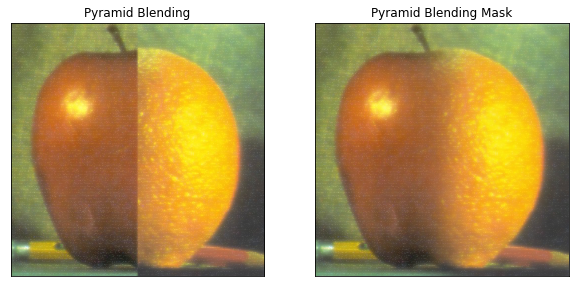

In [43]:
# parameters
g_size = 255  # gaussian mask blur size
depth = 3  # pyramid depth size

""" PYRAMID BLENDING """
row, col, dpt = A.shape
# generate Gaussian pyramid for imgA
G = A.copy()
gp1 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp1.append(G)

# generate Gaussian pyramid for imgB
G = B.copy()
gp2 = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gp2.append(G)

# generate Laplacian pyramid for imgA
lp1 = [gp1[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp1[i], dstsize=(gp1[i-1].shape[1], gp1[i-1].shape[0]))
    lp = cv2.subtract(gp1[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp1.append(lp)

# generate Laplacian pyramid for imgB
lp2 = [gp2[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gp2[i], dstsize=(gp2[i-1].shape[1], gp2[i-1].shape[0]))
    lp = cv2.subtract(gp2[i-1], hr, cv2.CV_32F)  # subtract different levels
    lp2.append(lp)

# add left and right halves of images in each level
LP = []
for la, lb in zip(lp1, lp2):
    row, cols, dpt = la.shape
    # stack columns (half and half)
    lp = np.hstack((la[:, :round(cols/2)], lb[:, round(cols/2):]))
    LP.append(lp)

# build Gaussian pyramid from selected region
mask = np.zeros((A.shape[1], A.shape[0]))
# create mask
mask[:, round(A.shape[1]/2):] = 1
# blur mask
mask = cv2.GaussianBlur(mask, (g_size, g_size), 0)
# generate Gaussian pyramid
G = mask.copy()
GR = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    GR.append(G)

# add left and right halves of images in each level using Gaussian mask
LP_mask = []
i = 1
for la, lb in zip(lp1, lp2):
    idx = depth - i
    # blend each channel separately using Gaussian filter
    ba, ga, ra = cv2.split(la)
    bb, gb, rb = cv2.split(lb)
    b_blend = (1-GR[idx]) * ba + GR[idx] * bb
    g_blend = (1-GR[idx]) * ga + GR[idx] * gb
    r_blend = (1-GR[idx]) * ra + GR[idx] * rb
    lp = cv2.merge((b_blend, g_blend, r_blend))
    lp = np.uint8(lp)  # convert back to uint8
    LP_mask.append(lp)
    i += 1

# now reconstruct
rs = LP[0]
for i in range(1, depth):
    rs = cv2.pyrUp(rs)  # upsample current lp image
    rs = cv2.add(rs, LP[i])  # add lp image

# now Gaussian mask reconstruct
rs_mask = LP_mask[0]
for i in range(1, depth):
    rs_mask = cv2.pyrUp(rs_mask)  # upsample current lp image
    rs_mask = cv2.add(rs_mask, LP_mask[i])  # add lp image

# display results
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(rs, cv2.COLOR_RGB2BGR))
plt.title('Pyramid Blending'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(rs_mask, cv2.COLOR_RGB2BGR))
plt.title('Pyramid Blending Mask'), plt.xticks([]), plt.yticks([])
plt.show()